In [2]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import pandas as pd
from scipy.ndimage import center_of_mass

In [3]:
(images, _), (_, _) = mnist.load_data()
flattened = images.reshape(images.shape[0], -1)
print(flattened.shape)

# SVD
svd = TruncatedSVD(n_components=(28*28) - 1)
X_svd = svd.fit_transform(flattened)

(60000, 784)


In [4]:
center_of_mass = np.array([center_of_mass(img) for img in images])
print(center_of_mass.shape)

(60000, 2)


In [5]:
# Step 4: Calculate the translation vector as the offset to the desired center (14, 14)
center_of_images = np.full((60000, 2), [14, 14])
print(center_of_images.shape)

(60000, 2)


In [6]:
b = center_of_images - center_of_mass
print(b.shape)

(60000, 2)


In [7]:
translated_images = np.concatenate((flattened, b), axis=1)


# Step 8: Perform SVD on the translated dataset
svd_translated = TruncatedSVD(n_components=(28*28) - 1)
X_translated_svd = svd_translated.fit_transform(translated_images)

AttributeError: 'TruncatedSVD' object has no attribute 'singular_values'

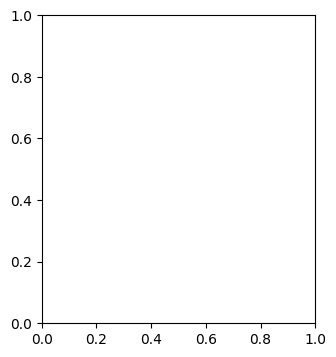

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(svd.singular_values, marker='o', markersize=1)
plt.title("Singular Values of Original Dataset")
plt.xlabel("Singular Value Index")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)

plt.subplot(132)
plt.plot(svd_translated.singular_values, marker='o', color='orange', markersize=1)
plt.title("Singular Values of Translated Dataset")
plt.xlabel("Singular Value Index")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)